4
{1: [(1, 2)], 2: [(2, 3)], 3: [(1, 3)]}


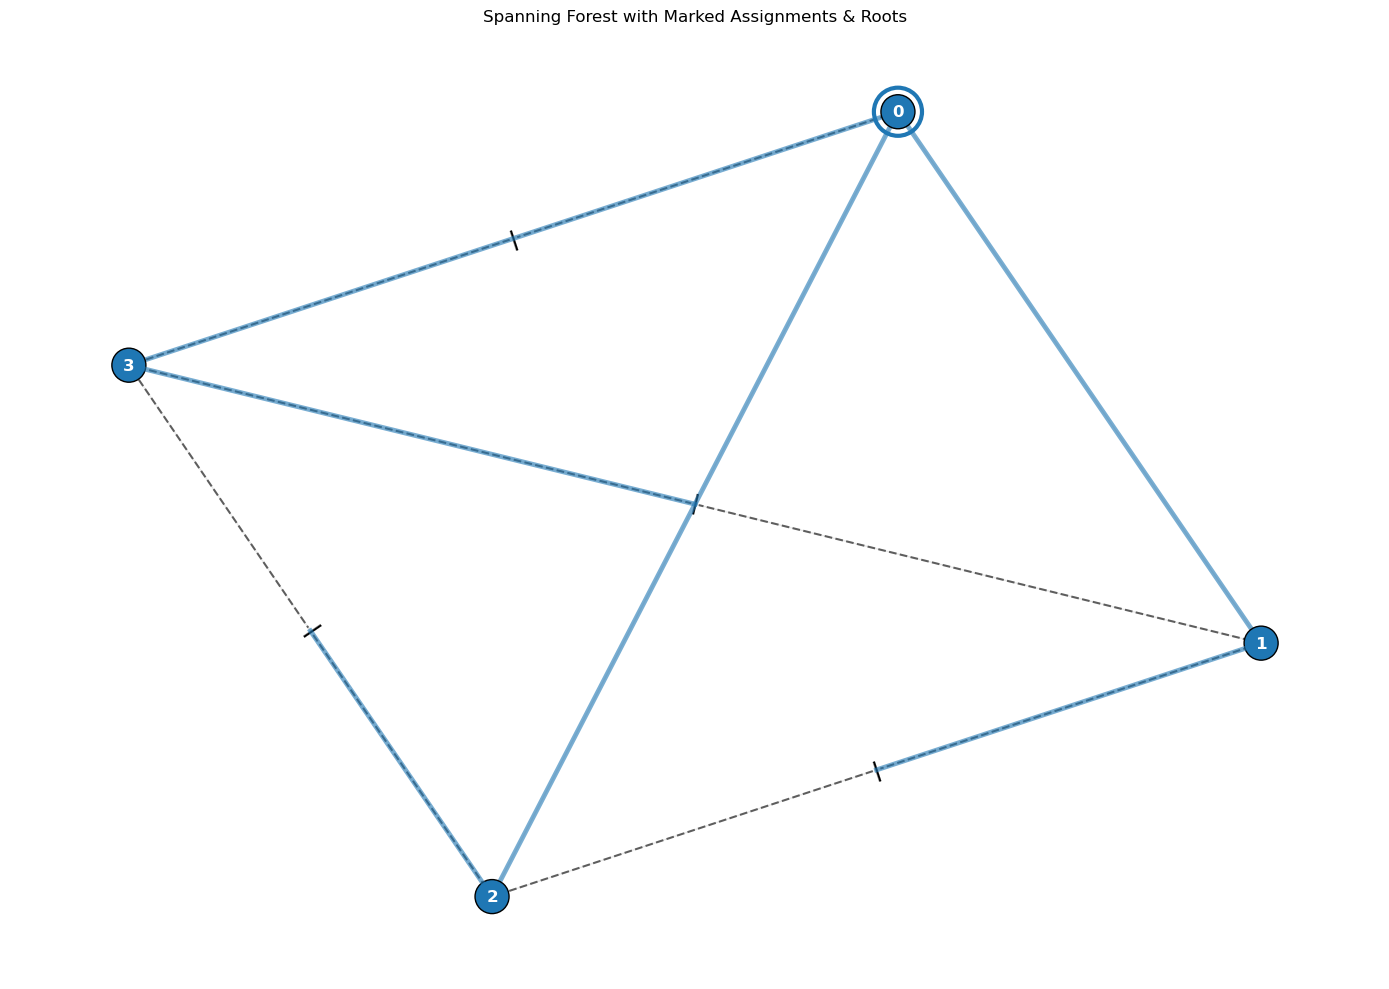

In [4]:
import networkx as nx
from spidercat.spanning_tree import *

grf = nx.complete_graph(4)
# grf = nx.petersen_graph()
# grf = nx.from_edgelist([[0, 17], [0, 1], [0, 11], [1, 2], [1, 8], [2, 3], [2, 17], [3, 4], [3, 16], [4, 5], [4, 15], [5, 6], [5, 10], [6, 7], [6, 13], [7, 8], [7, 14], [8, 9], [9, 10], [9, 12], [10, 11], [11, 12], [12, 13], [13, 14], [14, 15], [15, 16], [16, 17]])
pos = nx.kamada_kawai_layout(grf)
from spidercat.markings import GraphMarker

mrkr = GraphMarker(grf, max_marks=25)
M = mrkr.find_solution(T=4)
print(sum(M.values()))

forest = build_trivial_spanning_forest(grf, M)
matchings = match_forest_leaves_to_marked_edges(forest, M)
roots = find_min_height_roots(forest)
# draw_spanning_forest_solution(grf, forest, M, matchings, roots)

spacing_tree = forest
spacing_tree = build_min_diameter_spanning_tree(grf, forest, M)
matchings = match_forest_leaves_to_marked_edges(spacing_tree, M)
print(matchings)
roots = find_min_height_roots(spacing_tree)
draw_spanning_forest_solution(grf, spacing_tree, M, matchings, roots)

M: {(0, 1): 0, (0, 2): 0, (0, 3): 1, (1, 2): 1, (1, 3): 1, (2, 3): 1}
matchings: {1: [(1, 2)], 2: [(2, 3)], 3: [(1, 3)]}
=== Starting Clean Extraction ===
  Estimated Data Qubits: 4
  Flags start at: 4
Init Root 0 (Tree 0) -> Q0
  Node 0 -> Branch 2 (New Q1)
    Match Allocation: Node 2 absorbs (2, 3)
    Link (1, 2) (1st visit): Created Flag 4, CNOT 1->4
    Link (2, 3) (1st visit): Created Flag 5, CNOT 1->5
  Node 0 -> Branch 3 (New Q2)
    Internal Mark (0, 3): Added Q3
    Match Allocation: Node 3 absorbs (1, 3)
    Link (2, 3) (2nd visit): Retrieved Flag 5, CNOT Q2->5
    Link (1, 3) (1st visit): Created Flag 6, CNOT 2->6
  Node 0 -> Primary 1 (Inherits Q0)
    Match Allocation: Node 1 absorbs (1, 2)
    Link (1, 3) (2nd visit): Retrieved Flag 6, CNOT Q0->6
    Link (1, 2) (2nd visit): Retrieved Flag 4, CNOT Q0->4
Generating Detectors...
H 0
CX 0 1 1 4 1 5 0 2 2 3 2 5
MR 5
DETECTOR rec[-1]
CX 2 6 0 6
MR 6
DETECTOR rec[-1]
CX 0 4
MR 4
DETECTOR rec[-1]


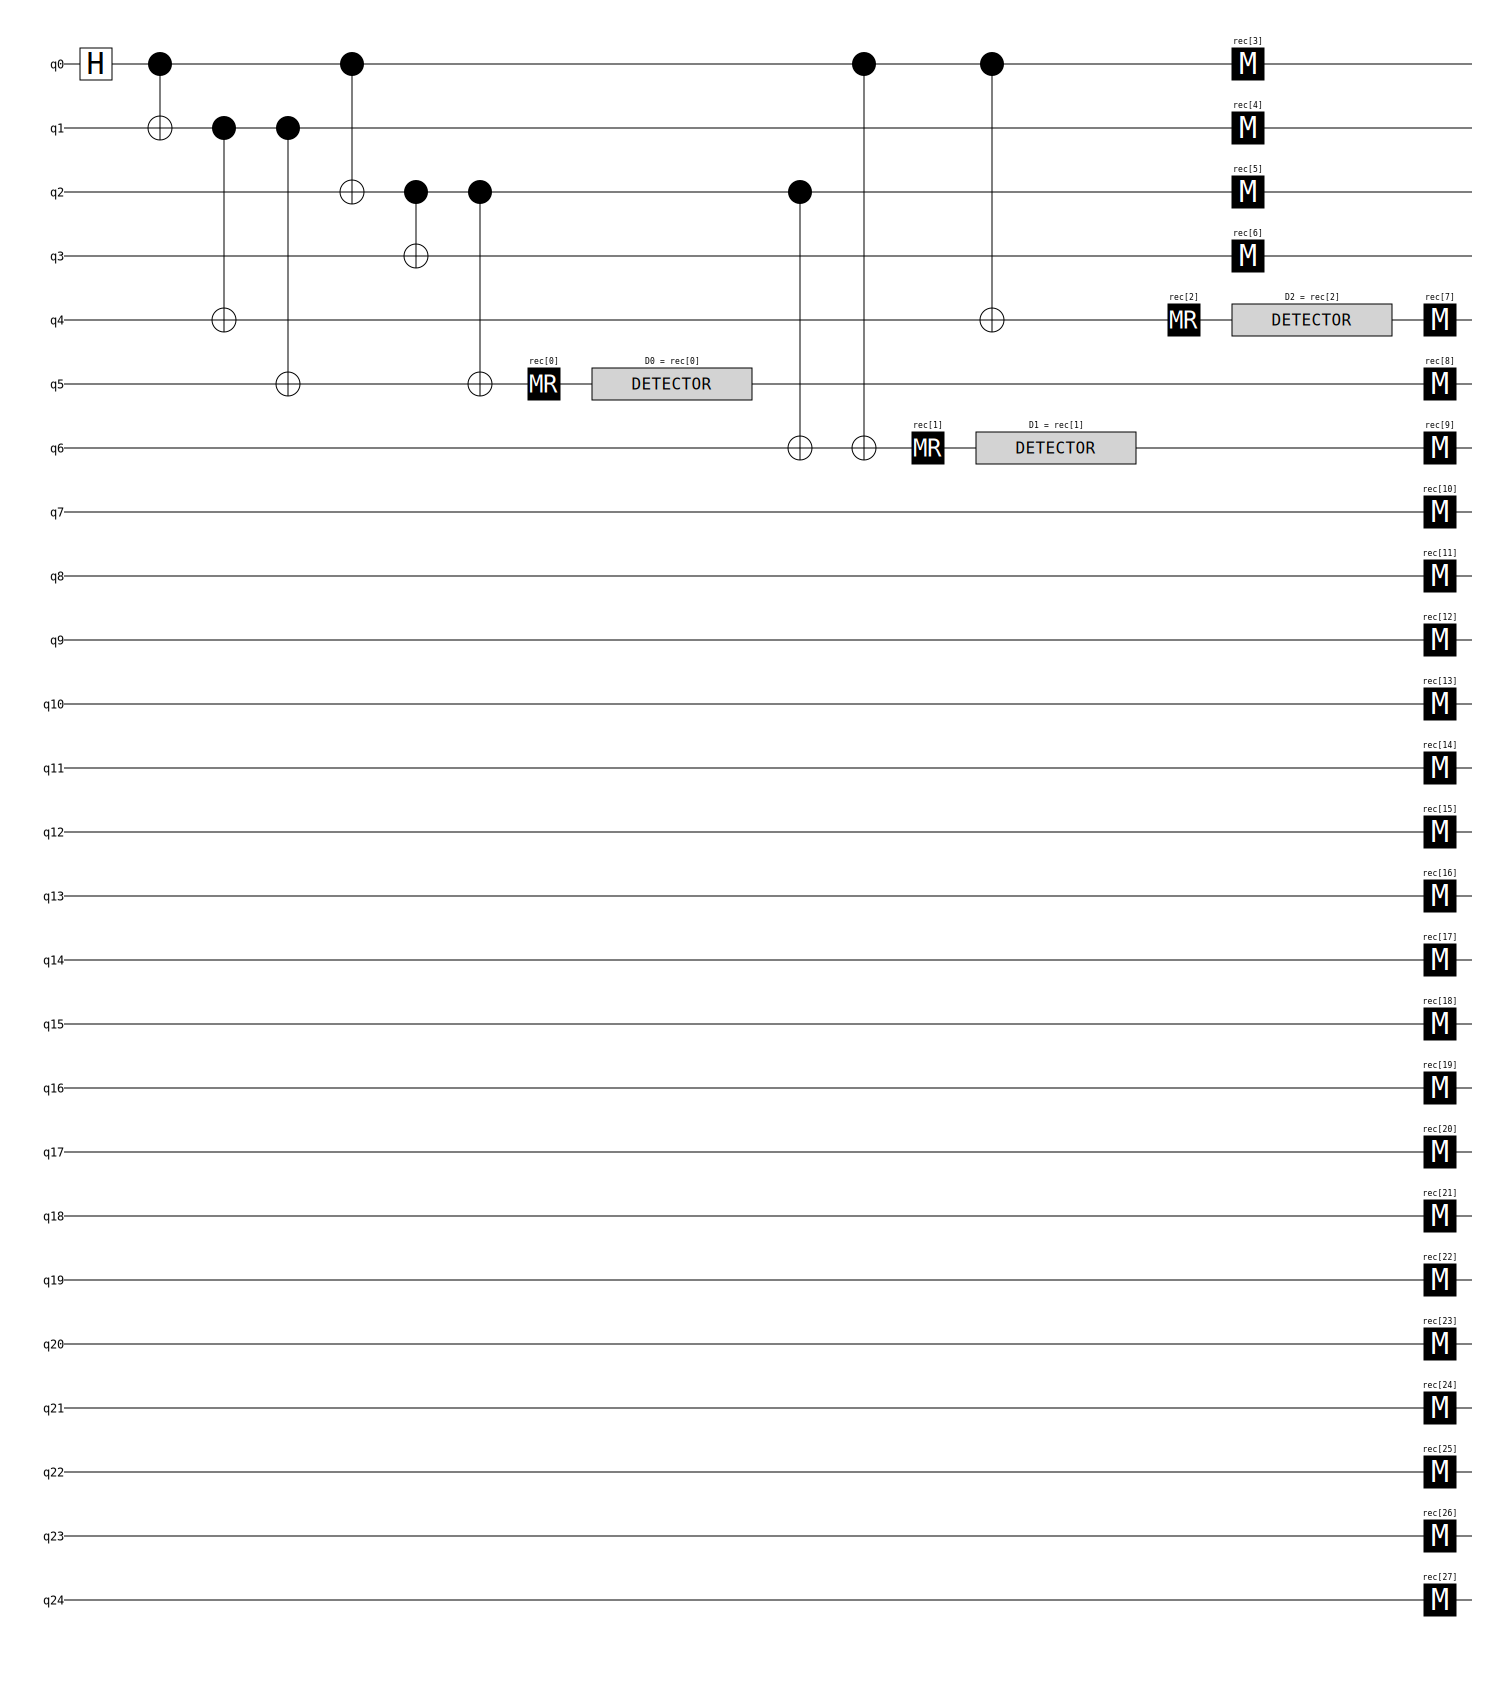

In [5]:
from spidercat.circuit_extraction import extract_circuit_rooted
M = {ed(*k): v for k, v in M.items()}
print("M:", M)
print("matchings:", matchings)
circ = extract_circuit_rooted(grf, spacing_tree, roots, M, matchings, verbose=True)
print(circ)
circ.append("M", range(25))
circ.diagram('timeline-svg')

In [19]:
sampler = circ.compile_sampler()
sampler.sample(10)

array([[False, False, False, False, False, False, False, False, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
        False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, Fa

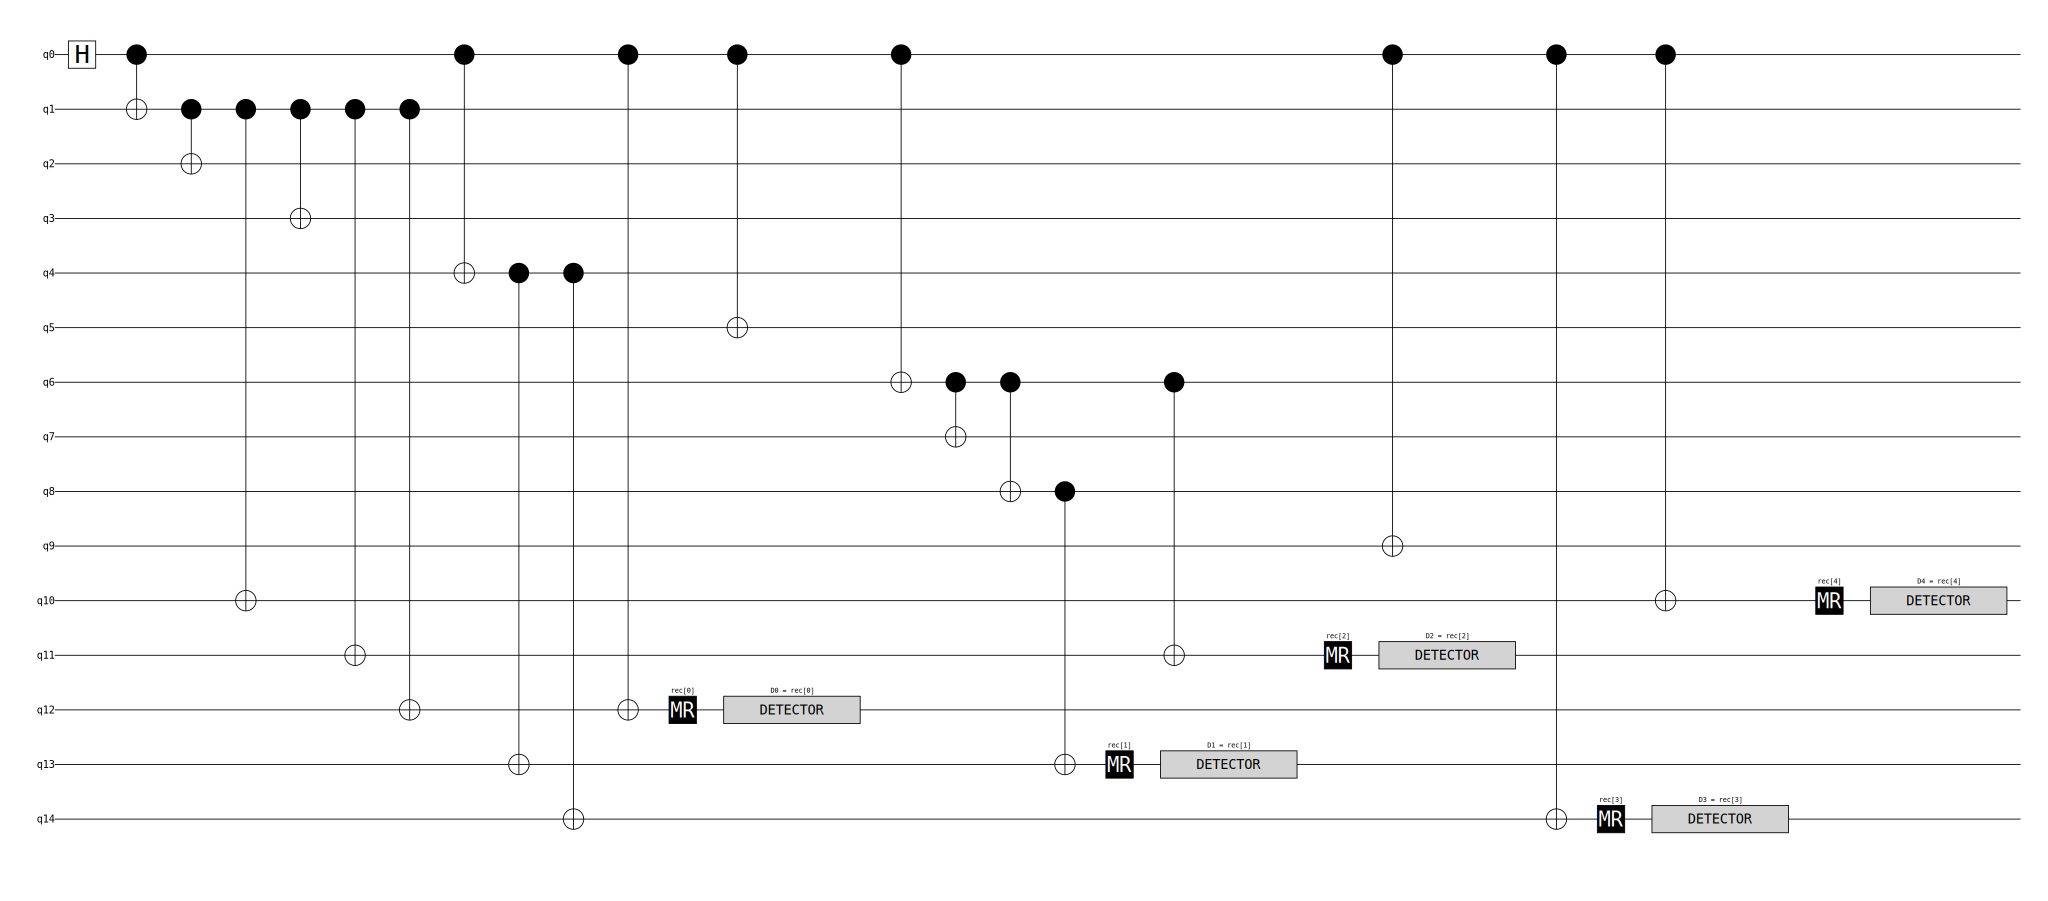

In [1]:
import stim

c = stim.Circuit('''
H 0
CX 0 1 1 2 1 23 1 24 0 3 3 4 3 5 5 6 5 7 7 25 5 26 3 8 3 9 9 10 9 26
MR 26
DETECTOR rec[-1]
CX 9 27 3 11 3 28 3 12 12 29 3 23
MR 23
DETECTOR rec[-1]
CX 0 13 0 14 14 15 14 24
MR 24
DETECTOR rec[-1]
CX 14 16 14 27
MR 27
DETECTOR rec[-1]
CX 14 17 14 30 14 31 0 18 0 19 19 20 19 29
MR 29
DETECTOR rec[-1]
CX 19 21 19 25
MR 25
DETECTOR rec[-1]
CX 19 30
MR 30
DETECTOR rec[-1]
CX 0 22 0 31
MR 31
DETECTOR rec[-1]
CX 0 28
MR 28
DETECTOR rec[-1]
''')
c.diagram('timeline-svg')

In [ ]:
{"G.edges": [[0, 5], [0, 1], [0, 3], [1, 2], [1, 4], [2, 3], [2, 5], [3, 4], [4, 5]], "M_inv": {"1": [[0, 5], [0, 1], [1, 2], [1, 4], [2, 3], [2, 5], [3, 4], [4, 5]], "0": [[0, 3]]}, "H": [[0, 3, 2, 5, 4, 1]], "matching": {"1": 0}, "t": 4, "n": 8, "p": 1}